# 数据读入
这里我们一步到位，只做多变量的任务。
读入时最好使用matrix，便于做矩阵运算。
记得X需要加一列全1项。

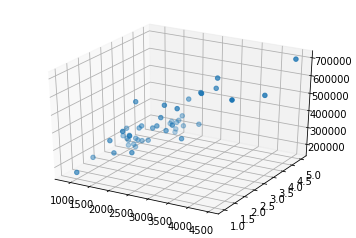

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
raw_data = np.loadtxt('ex1data2.txt', delimiter=',')
m = len(raw_data)
X = np.mat([np.ones(m), raw_data[:,0], raw_data[:,1]]).reshape(m,3)
y = np.mat(raw_data[:,2]).reshape(m,1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(raw_data[:,0], raw_data[:,1], raw_data[:,2])

# 正则化
对X进行正则化有利于梯度下降法快速收敛。

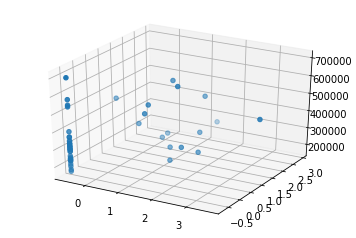

In [5]:
scaler = StandardScaler().fit(X)
X = np.mat(scaler.transform(X))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1], X[:,2], y)

# 代价函数

In [19]:
def J(X, y, theta):
    D = X*theta - y
    return (len(theta)/2 * (D.T*D))[0,0]

# 梯度下降法
使用梯度下降法进行求解，关键是将theta的迭代公式用矩阵表达出来。原公式为：
$$\theta_j:=\theta_j-\frac{\alpha}{m}\sum\limits_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}$$
用矩阵表示为：
$$\theta:=\theta-\frac{\alpha}{m}((X\theta-y)^TX)^T$$

matrix([[-34142.89223157],
        [ 23719.06186552],
        [ 21911.51346941]])

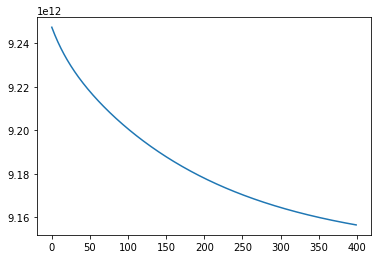

In [22]:
num_iters = 400
alpha = 0.01
theta = np.mat(np.zeros(3)).reshape(3,1)
J_history = []
for iter in range(0, num_iters):
    theta = theta - (alpha/m) * ((X*theta-y).T*X).T
    J_history.append(J(X,y,theta))
plt.plot(range(0,num_iters), J_history)
theta

# 正则方程法

In [23]:
theta = (X.T*X).I * X.T * y
theta

matrix([[-55739.70029344],
        [ 39750.33809588],
        [ 26873.9260849 ]])

# 使用scikit-learn的线性回归

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X[:,1:3], y, random_state=1)
linreg = LinearRegression(normalize=True)
linreg.fit(X_train, y_train)
print (linreg.intercept_, linreg.coef_)
linreg.score(X_test, y_test)

[340583.44223893] [[ 11.32442439 -13.50821845]]


-0.07509051325545357